In [93]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
data={
    "Age":[25,51,46,18,34,23,60,40,29,37],
    "Income":["low","medium","low","low","medium","medium","high","low","medium","high"],
    "CreditScore":["exce","fair","exce","exce","fair","fair","exce","exce","fair","fair"],
    "LoanApproved":["no","yes","no","yes","yes","no","yes","no","no","yes"]
}
dataset=pd.DataFrame(data)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           10 non-null     int64 
 1   Income        10 non-null     object
 2   CreditScore   10 non-null     object
 3   LoanApproved  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [116]:
dataset.head()

,Age,Income,CreditScore,LoanApproved
0,25,low,exce,no
1,51,medium,fair,yes
2,46,low,exce,no
3,18,low,exce,yes
4,34,medium,fair,yes


In [117]:
#conver values in numeric
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for column in ['Income','CreditScore','LoanApproved']:
    le = LabelEncoder()
    dataset[column]=le.fit_transform(dataset[column])
    label_encoders[column]=le

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           10 non-null     int64
 1   Income        10 non-null     int64
 2   CreditScore   10 non-null     int64
 3   LoanApproved  10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [119]:
x=dataset[['Age','Income','CreditScore']]
y=dataset['LoanApproved']

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [121]:
model_ds=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)


In [122]:
model_ds.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


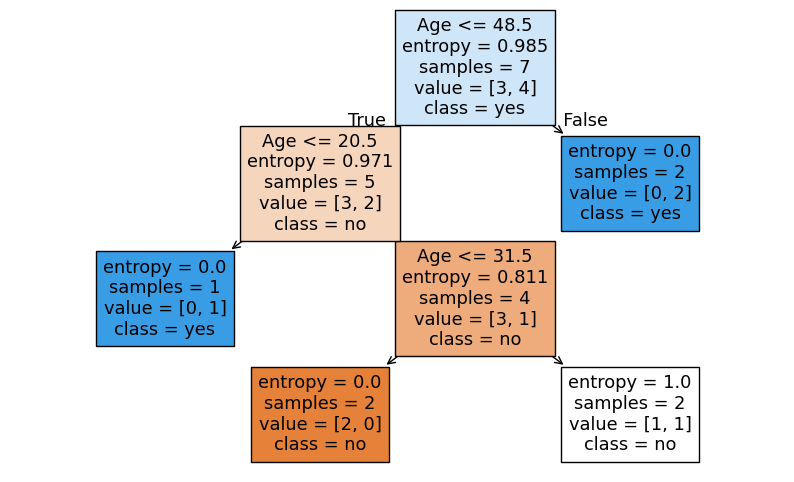

In [123]:
plt.figure(figsize=(10,6))
plot_tree(model_ds,feature_names=['Age','Income','CreditScore'],class_names=label_encoders['LoanApproved'].classes_,filled=True)
plt.show()

In [124]:
y_pred=model_ds.predict(x_test)
print("confusion matrix-\n",confusion_matrix(y_test,y_pred))
print("classification Report-\n",classification_report(y_test,y_pred,zero_division=0))

confusion matrix-
 [[2 0]
 [1 0]]
classification Report-
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [127]:
print("-------User Input Prediction----")
Age	=int(input("enter age"))
Income=input("enter input")
CreditScore=input("enter creditscore")

income_encode=label_encoders["Income"].transform([Income])[0]
credit_encode=label_encoders["CreditScore"].transform([CreditScore])[0]

-------User Input Prediction----


enter age 25
enter input low
enter creditscore exce


In [132]:
user_data=pd.DataFrame([[Age,income_encode,credit_encode]],columns=['Age','Income','CreditScore'])

In [133]:
prediction_user=model_ds.predict(user_data)[0]
result=label_encoders['LoanApproved'].inverse_transform([prediction_user])[0]
print(result)

no
